# Project: Predicting patients turnup for an event.

In [1]:
#Basics
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, accuracy_score, r2_score, mean_squared_error, mean_absolute_error, median_absolute_error
from xgboost import XGBClassifier

import pickle

In [2]:
# loading dataset
preprocessed = pd.read_csv('../data/preprocessed.csv')
preprocessed.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,...,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,Age_groups
0,F,62,0,1,0,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4
1,M,56,0,0,0,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4
2,F,62,0,0,0,0,0,0,1,4,...,6,0,0,0,0,1,0,0,0,4
3,F,8,0,0,0,0,0,0,1,4,...,6,0,0,0,0,0,1,0,0,1
4,F,56,0,1,1,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4


In [3]:
# creating a copy before preprocessing
df = preprocessed.copy()

In [4]:
# encode gender column to be '0' (Male) and '1' (Female)
df['Gender'].replace(to_replace=['M', 'F'], value=['0', '1'], inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,...,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,Age_groups
0,1,62,0,1,0,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4
1,0,56,0,0,0,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4
2,1,62,0,0,0,0,0,0,1,4,...,6,0,0,0,0,1,0,0,0,4
3,1,8,0,0,0,0,0,0,1,4,...,6,0,0,0,0,0,1,0,0,1
4,1,56,0,1,1,0,0,0,1,4,...,6,0,0,0,1,0,0,0,0,4


In [5]:
# searching for correlation amongst columns
df.corr().style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,neigbhorhood_1,neigbhorhood_2,neigbhorhood_3,neigbhorhood_4,neigbhorhood_5,neigbhorhood_6,neigbhorhood_7,neigbhorhood_8,Age_groups
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,-0.003016,0.011381,0.014572,0.003068,0.014771,-0.012308,-0.030534,0.045435,-0.001561,-0.008286,-0.011052,-0.017298,0.958435
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,0.016817,-0.004967,-0.002583,-0.000677,0.014331,0.039663,0.008299,-0.039499,-0.062876,-0.016248,0.025298,0.049770,-0.096187
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,0.025000,0.000679,0.003786,0.003449,0.038960,0.040953,-0.007034,-0.060778,-0.075066,0.017341,0.024058,0.042898,0.489007
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,0.025600,-0.000387,0.003745,0.006611,0.016605,0.018680,-0.002113,-0.037918,-0.041174,0.008839,0.020747,0.029514,0.287269
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,0.028774,0.006628,0.003922,0.002699,0.007321,0.052005,-0.003606,-0.045709,-0.031553,0.002596,0.028832,0.011260,0.104546
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,0.014955,0.000610,-0.001477,0.004350,0.011624,0.014227,-0.003682,-0.036877,-0.016901,0.002588,0.021513,0.019848,0.063762
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,-0.294083,0.078548,0.108082,-0.089867,-0.029506,-0.011044,-0.001975,0.014904,0.017381,0.019400,-0.009964,-0.003462,0.016392
Show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,0.160856,-0.006014,0.020879,-0.001158,-0.011096,0.009179,-0.001450,-0.003586,0.001330,-0.002313,0.005641,0.005552,0.063971
scheduled_month,-0.003016,0.016817,0.025000,0.025600,0.028774,0.014955,-0.294083,0.160856,1.000000,-0.031724,0.527615,-0.043002,0.016340,0.020771,0.009004,-0.063140,-0.017762,0.006649,0.028566,0.022020,-0.002941
scheduled_day,0.011381,-0.004967,0.000679,-0.000387,0.006628,0.000610,0.078548,-0.006014,-0.031724,1.000000,-0.038686,0.328790,-0.000240,-0.010926,-0.007641,-0.006442,-0.013458,0.027331,0.001865,0.008778,0.009382


In [6]:
# then remove some of the independent variables that are highly correlated and would cause problems with the algorithm due to multicollinearity
# drop Neighbourhood due to its large categories
df.drop(['Age'], axis=1, inplace=True)
df.columns.values

array(['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'Show', 'scheduled_month',
       'scheduled_day', 'appointment_month', 'appointment_day',
       'neigbhorhood_1', 'neigbhorhood_2', 'neigbhorhood_3',
       'neigbhorhood_4', 'neigbhorhood_5', 'neigbhorhood_6',
       'neigbhorhood_7', 'neigbhorhood_8', 'Age_groups'], dtype=object)

In [7]:
# separate x_inputs and y_targets variables
y_targets = df.Show
x_inputs = df.drop(['Show'], axis=1)

In [8]:
X_test,X_train,y_test,y_train = train_test_split(x_inputs, y_targets, test_size=0.2, random_state=42)

In [9]:
# standardizing the inputs
numeric=['Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'Handcap', 'SMS_received']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

0.7963809092965393
##################################################
##################################################
              precision    recall  f1-score   support

           0       0.35      0.00      0.01     17928
           1       0.80      1.00      0.89     70492

    accuracy                           0.80     88420
   macro avg       0.57      0.50      0.45     88420
weighted avg       0.71      0.80      0.71     88420



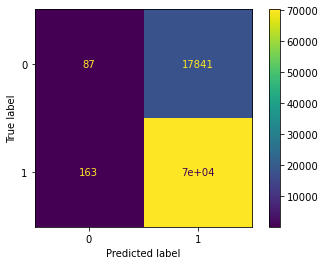

In [10]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)
pred = logistic_model.predict(X_test)
print(metrics.accuracy_score(y_test, pred))
print('#' * 50)
print(plot_confusion_matrix(logistic_model, X_test, y_test))
print('#' * 50)
print(metrics.classification_report(y_test, pred))

In [11]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor(random_state=1)
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)

In [12]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_test)
xgb_score = metrics.accuracy_score(y_test,prediction_xgb)
print(f"The accuracy of the XGBoost Model is {round(xgb_score, 2)}%")

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
                categorical type is supplied, DMatrix parameter `enable_categorical` must
                be set to `True`.Gender

In [ ]:
# create an object to subtract the mean and divide by the SD featurewise
show_scalar = StandardScaler()

In [ ]:
show_scalar.fit(x_inputs)

In [ ]:
scaled_inputs = show_scalar.transform(x_inputs)

In [ ]:
scaled_inputs.shape

In [ ]:
# spilting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, y_targets, train_size=0.8, random_state= 100)

In [ ]:
# view output shapes
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", len(y_train))
print("Y_train:", len(y_test))

In [ ]:
#Declare a logistic regression classifier
classifier = LogisticRegression(solver='liblinear',C=10.0, max_iter=1000).fit(x_train, y_train)

In [ ]:
#Make predictions on test data
pred = classifier.predict(x_test)

# evaluate the model accuracy
classifier.score(x_train,y_train)

In [ ]:
classifier.score(x_test, y_test)

In [ ]:
plot_confusion_matrix(classifier, x_test, y_test)

In [ ]:
# finding the intercept and coefficient 
print(classifier.intercept_)
classifier.coef_

In [ ]:
feature_name = x_inputs.columns.values
feature_name

In [ ]:
#creating a dataframe to contain the feature_names and the corresponding coefficient
summary_table = pd.DataFrame (columns=['feature name'], data = feature_name)

# matching the names with the coeffiecient
summary_table['coefficient'] =np.transpose(classifier.coef_) #transpose because ndarrays are rows not columns
summary_table

In [ ]:
# appending the intercept
# to shift the index of thee summary table so that the intercept comes first
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', classifier.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

In [ ]:
# find the exponentials of the coefficient, to make them more interpretable
summary_table['odds_ratio'] = np.exp(summary_table.coefficient)
summary_table

In [ ]:
# sort the dataframe by the 'odds_ratio' column
summary_table.sort_values('odds_ratio', ascending = False)


## Testing Model

In [ ]:
classifier.score(x_test,y_test)

In [ ]:
# getting the probability of an output being 0 or 1
predicted_proba = classifier.predict_proba(x_test)
predicted_proba

In [ ]:
# getting the probability of an output being 0 or 1
predicted = classifier.predict(x_test)
predicted

In [ ]:
#slicing the output to get the probability of excessive absenteeism
predicted_proba[:,1]

In [ ]:
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

### Save Model

In [ ]:
with open('model', 'wb') as file:
    pickle.dump(classifier, file)

In [ ]:
with open('scaler', 'wb') as file:
    pickle.dump(show_scalar,file)